In [1]:
using Plots
using Distributions
using Random, DataFrames
using LinearAlgebra
using MLJ, MLJLinearModels
include("src/qsrfe.jl")
using .qsrfe

In [64]:
#point cloud
n, m = 20, 50
function ontoring(data, radius)
    da = zeros(size(data))
    for i in 1:size(data,1)
        da[i,:] = data[i,:] ./ norm(data[i,:]) .* radius
    end
    return da
end
data1 = rand(Normal(0.,0.5),(n,2))
data2 = ontoring(rand(Normal(0.,0.5),(m,2)),4) .+ rand(Normal(0.,0.5),(m,2))
xtrain = vcat(data1,data2)
xtrain = vcat(xtrain, xtrain .+ [7 5],xtrain .+ [-1 -7])
ytrain = [ones(Float64,n) .* 1;zeros(Float64,m)];
ytrain = vcat(ytrain, ytrain, ytrain);

In [14]:
#100 times 100 grid hack
x = range(-13, 13, length=100)
y = range(-13, 13, length=100)
z = [[i j] for i in x, j in y]
zz = zeros(Float64,(1,2))
for i in 1:100, j in 1:100
    zz = vcat(zz,z[i,j])
end
zz = zz[2:size(zz,1),:];

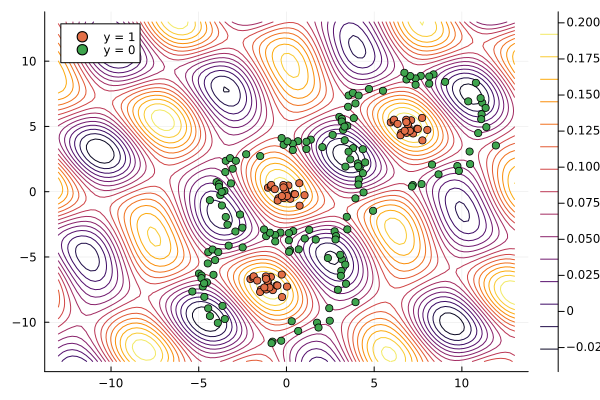

In [66]:
#prediction contour plot
srfe = qsrfe.srfeRegressor(;N=600, λ= 0.2, intercept=false)

c, ω, ζ = qsrfe.fit(srfe,xtrain,ytrain)
zzz = qsrfe.predict(srfe,zz,c,ω,ζ)
zzz = reshape(zzz,(100,100))
contour(x,y,zzz)
scatter!(xtrain[ytrain .== 1,1],xtrain[ytrain .== 1,2], label="y = 1")
scatter!(xtrain[ytrain .== 0,1],xtrain[ytrain .== 0,2],label="y = 0")

In [20]:
xtrain[ytrain .== 0,1]

100-element Vector{Float64}:
 -2.529457508476526
 -3.95719106400873
  3.039448454896019
  0.32445689541752387
  3.6075181638093454
 -1.8810537194258974
  2.6312942814508458
  3.2499664164691366
 -2.5337843083790714
 -4.644919994655278
  ⋮
  5.313532394311897
  8.05363108915821
  8.971483009048658
  7.445537383775799
  3.387132973282669
  6.46563433289189
  1.1092109115983058
  0.8613201046233421
  6.197093897723171